# Solving PDEs with FEniCS using Spatially Adaptive Combination Technique

## 2D Poisson Equation
In this example we are using Poisson function wich defines a 2D Poisson equation over a square domain with Dirichlet boundary conditions


 \begin{equation}
  \begin{split}
   -\nabla u =f,\; \,in\,\Omega,\\
   u=u_D,\; \,on\,\delta\Omega.
  \end{split}
 \end{equation}

 Lets define boundary values u_D and right hand side f to be:
 \begin{equation}
  u_D(x) = 1 + x_0^2 + x_1^2, \\
  f(x) = -6.
 \end{equation}
 


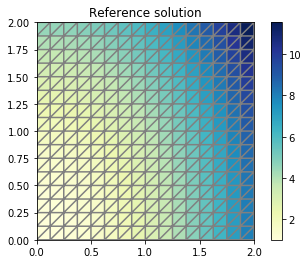

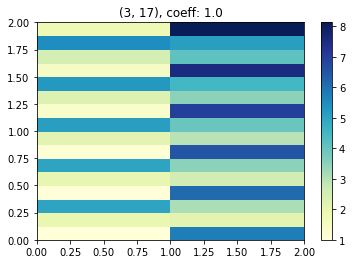

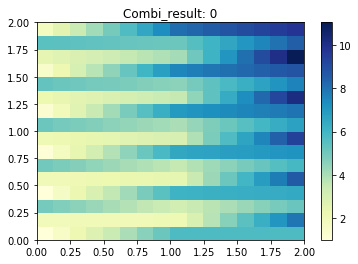

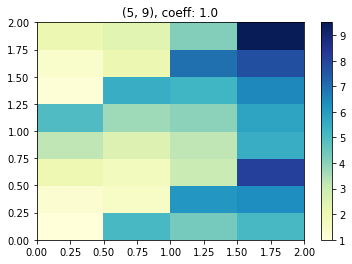

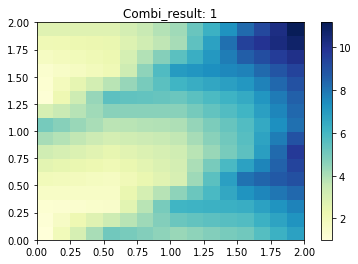

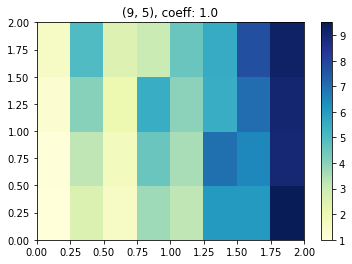

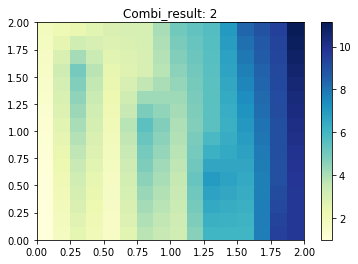

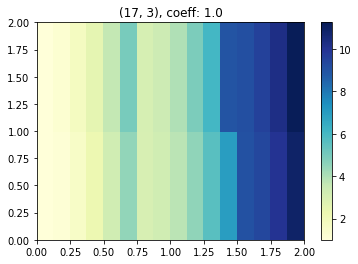

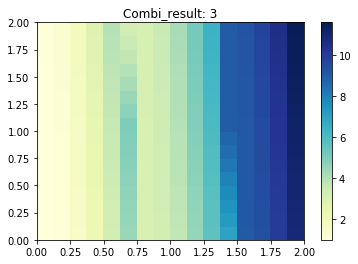

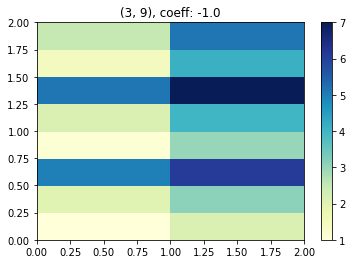

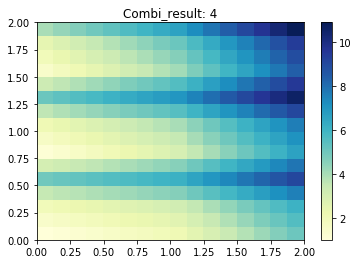

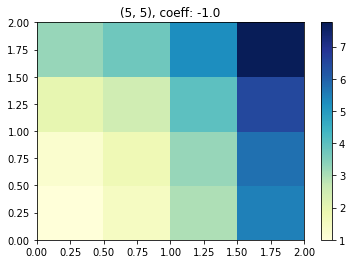

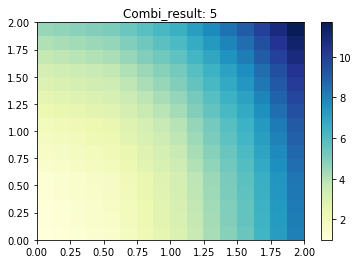

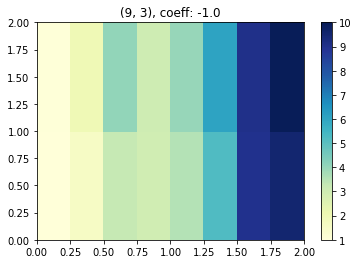

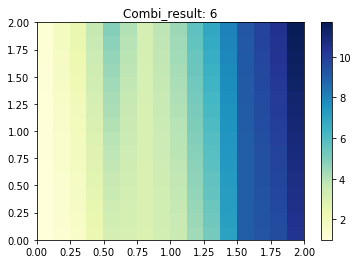

AttributeError: 'PDE_Solve' object has no attribute 'component_grid'

In [2]:
%matplotlib inline
from sys import path
path.append('../src/')
path.append('../PDE')

from fenics import *
import matplotlib.pyplot as plt
import numpy as np

from StandardCombi import *
from GridOperation import *
from ComponentGridInfo import *
from PDE_Solver import *

dim = 2
a = np.zeros(dim)
b = 2*np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)

# Grid setup
minimum_level = 1
maximum_level = 4
maxlv = (tuple(maximum_level*np.ones(dim, dtype=int)))
# maxlv= (1,4)
grid.setCurrentArea(a,b,maxlv)

# Model setup
poisson2D = Poisson('-6.0', 1, '1 + x[0]*x[0] + 2*x[1]*x[1]', 2, '1 + x[0]*x[0] + 2*x[1]*x[1]', 2)
poisson2D.define_rectangle_mesh(a,b, *(len(n) for n in grid.get_coordinates()))
reference_solution = poisson2D.solve()
X,Y = np.meshgrid(np.linspace(0,2,17),np.linspace(0,2,17))
plt.pcolor(X, Y, reference_solution , cmap='YlGnBu')
plt.colorbar()
poisson2D.plot_mesh()
plt.title("Reference solution")
plt.show()

# Combi setup and solution
operation = PDE_Solve(solver=poisson2D, grid=grid, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation, print_output=False)
combiObject.perform_operation(minimum_level, maximum_level)
combiObject.plot()

# Results
combiObject.print_resulting_combi_scheme(markersize=5)

## Instationary heat equation 
In this example we are using instationary Poisson equation, describing diffusion of a Gaussian Hill in a square domain with Dirichlet boundary conditions


 \begin{equation}
  \begin{split}
   \frac{du}{dt} = \nabla u + f \; in\ \Omega,\\
    u=u_D,\; \,on\,\delta\Omega \\
    u=u_0,\; \,at \ \,t=0.
  \end{split}
 \end{equation}

 with:
 \begin{equation}
  u_D(x,y) = f(x,y) = 0 \\
  u_0(x,y) = e^{-5x^2} + e^{-5y^2}
 \end{equation}

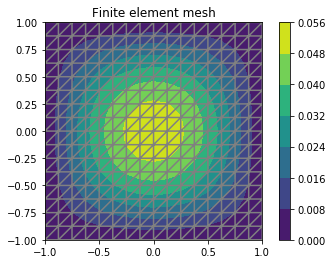

ComponentGrid data shape: (21, 3, 17)
ComponentGrid data shape: (21, 5, 9)
ComponentGrid data shape: (21, 9, 5)
ComponentGrid data shape: (21, 17, 3)
ComponentGrid data shape: (21, 3, 9)
ComponentGrid data shape: (21, 5, 5)
ComponentGrid data shape: (21, 9, 3)
combi_result shape: (21, 17, 17)


([<ComponentGridInfo.ComponentGridInfo at 0x7f943c5bdb00>,
 1.2572605823691176,
 array([[[ 4.53999298e-05,  3.92048678e-03, -5.58952052e-03, ...,
          -2.20882715e-01, -9.78499415e-02,  5.15478131e-01],
         [ 3.74934141e-04, -4.67247917e-02, -1.48999774e-02, ...,
          -1.59871814e-01, -2.43586409e-02,  6.30799417e-01],
         [ 3.76816742e-03, -9.43746801e-02, -2.12833533e-02, ...,
          -9.78779506e-02,  4.98599113e-02,  7.46592243e-01],
         ...,
         [ 7.46592243e-01,  4.98599113e-02, -9.78779506e-02, ...,
          -2.12833533e-02, -9.43746801e-02,  3.76816742e-03],
         [ 6.30799417e-01, -2.43586409e-02, -1.59871814e-01, ...,
          -1.48999774e-02, -4.67247917e-02,  3.74934141e-04],
         [ 5.15478131e-01, -9.78499415e-02, -2.20882715e-01, ...,
          -5.58952052e-03,  3.92048678e-03,  4.53999298e-05]],
 
        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -2.03453654e-01, -7.80862365e-02,  4.60827125e-01],
       

In [2]:
%matplotlib inline
from sys import path
path.append('../src/')
path.append('../PDE')

from fenics import *
import matplotlib.pyplot as plt
import numpy as np

from StandardCombi import *
from GridOperation import *
from ComponentGridInfo import *
from PDE_Solver import *

dim = 2
a = -1*np.ones(dim)
b = 1*np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)

# Grid setup
minimum_level = 1
maximum_level = 4
maxlv = tuple(maximum_level*np.ones(dim, dtype=int))
grid.setCurrentArea(a,b,maxlv)

# Model setup
dt=0.05
t_max=1
gauss = GaussianHill()
gauss.define_rectangle_mesh(a,b, *(len(n) for n in grid.get_coordinates()))
reference_solution = gauss.solve() #default dt=0.05, t=1
gauss.plot_mesh()
gauss.plot_solution(t=0.5)

# Combi setup and solution
operation = PDE_Solve(solver=gauss, grid=grid, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation, print_output=False)
combiObject.perform_operation(minimum_level, maximum_level)
# combiObject.plot()

# # Results
# combiObject.print_resulting_combi_scheme(markersize=5)